## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [2]:
test_data



,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [3]:
# remove concert id
try :
    train_data = train_data.drop(['concert_id'], axis = 1)
except:
    pass

# remove nan value from dataframe
train_data = train_data.dropna()

classes_lbl="Concert Enjoyment"
idx2class={0:"Worst Concert Ever", 1:"Did Not Enjoy", 2:"Enjoyed", 3:"Best Concert Ever"}
#reverse a dict
class2idx = {v: k for k, v in idx2class.items()}

classes_idexes={i:[] for i in range(4)}

for i,x in enumerate(train_data[classes_lbl]):
    classes_idexes[class2idx[x]].append(i)


Text(0.5, 0.98, 'Band Genre')

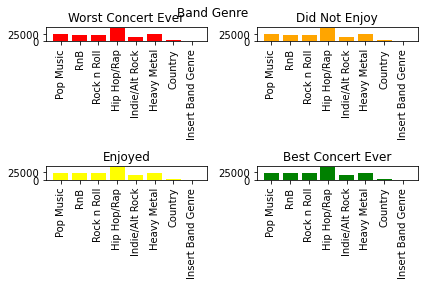

In [4]:
from collections import Counter

x_label="Concert Goer Age"
x_label="Band Genre"

x=train_data[x_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    
    #same x axis
    if x.dtype == 'float64':
        plt.hist(x.iloc[classes_idexes[i]], color=colors[i])
        plt.xlim([x.min(),x.max()])
    else:
        xx=Counter(x)
        df = pd.DataFrame.from_dict(xx, orient='index')
        plt.bar(df.index, df[0], color=colors[i])
        plt.xticks(rotation=90)
        

    plt.title(idx2class[i])



plt.tight_layout()
plt.suptitle(x_label)


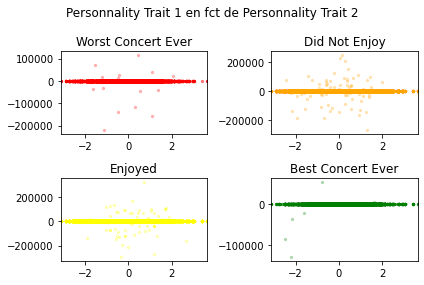

In [5]:

x_label='Personnality Trait 1'
y_label='Personnality Trait 2'
x=train_data[x_label]
y=train_data[y_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(idx2class[i])
    # sort by occurence of each genre
    plt.scatter(x.iloc[classes_idexes[i]], y.iloc[classes_idexes[i]], color=colors[i], label=idx2class[i], alpha=0.25,s=5)
    #same x axis
    plt.xlim(min(x),max(x))
plt.suptitle(x_label+" en fct de "+y_label)
plt.tight_layout()

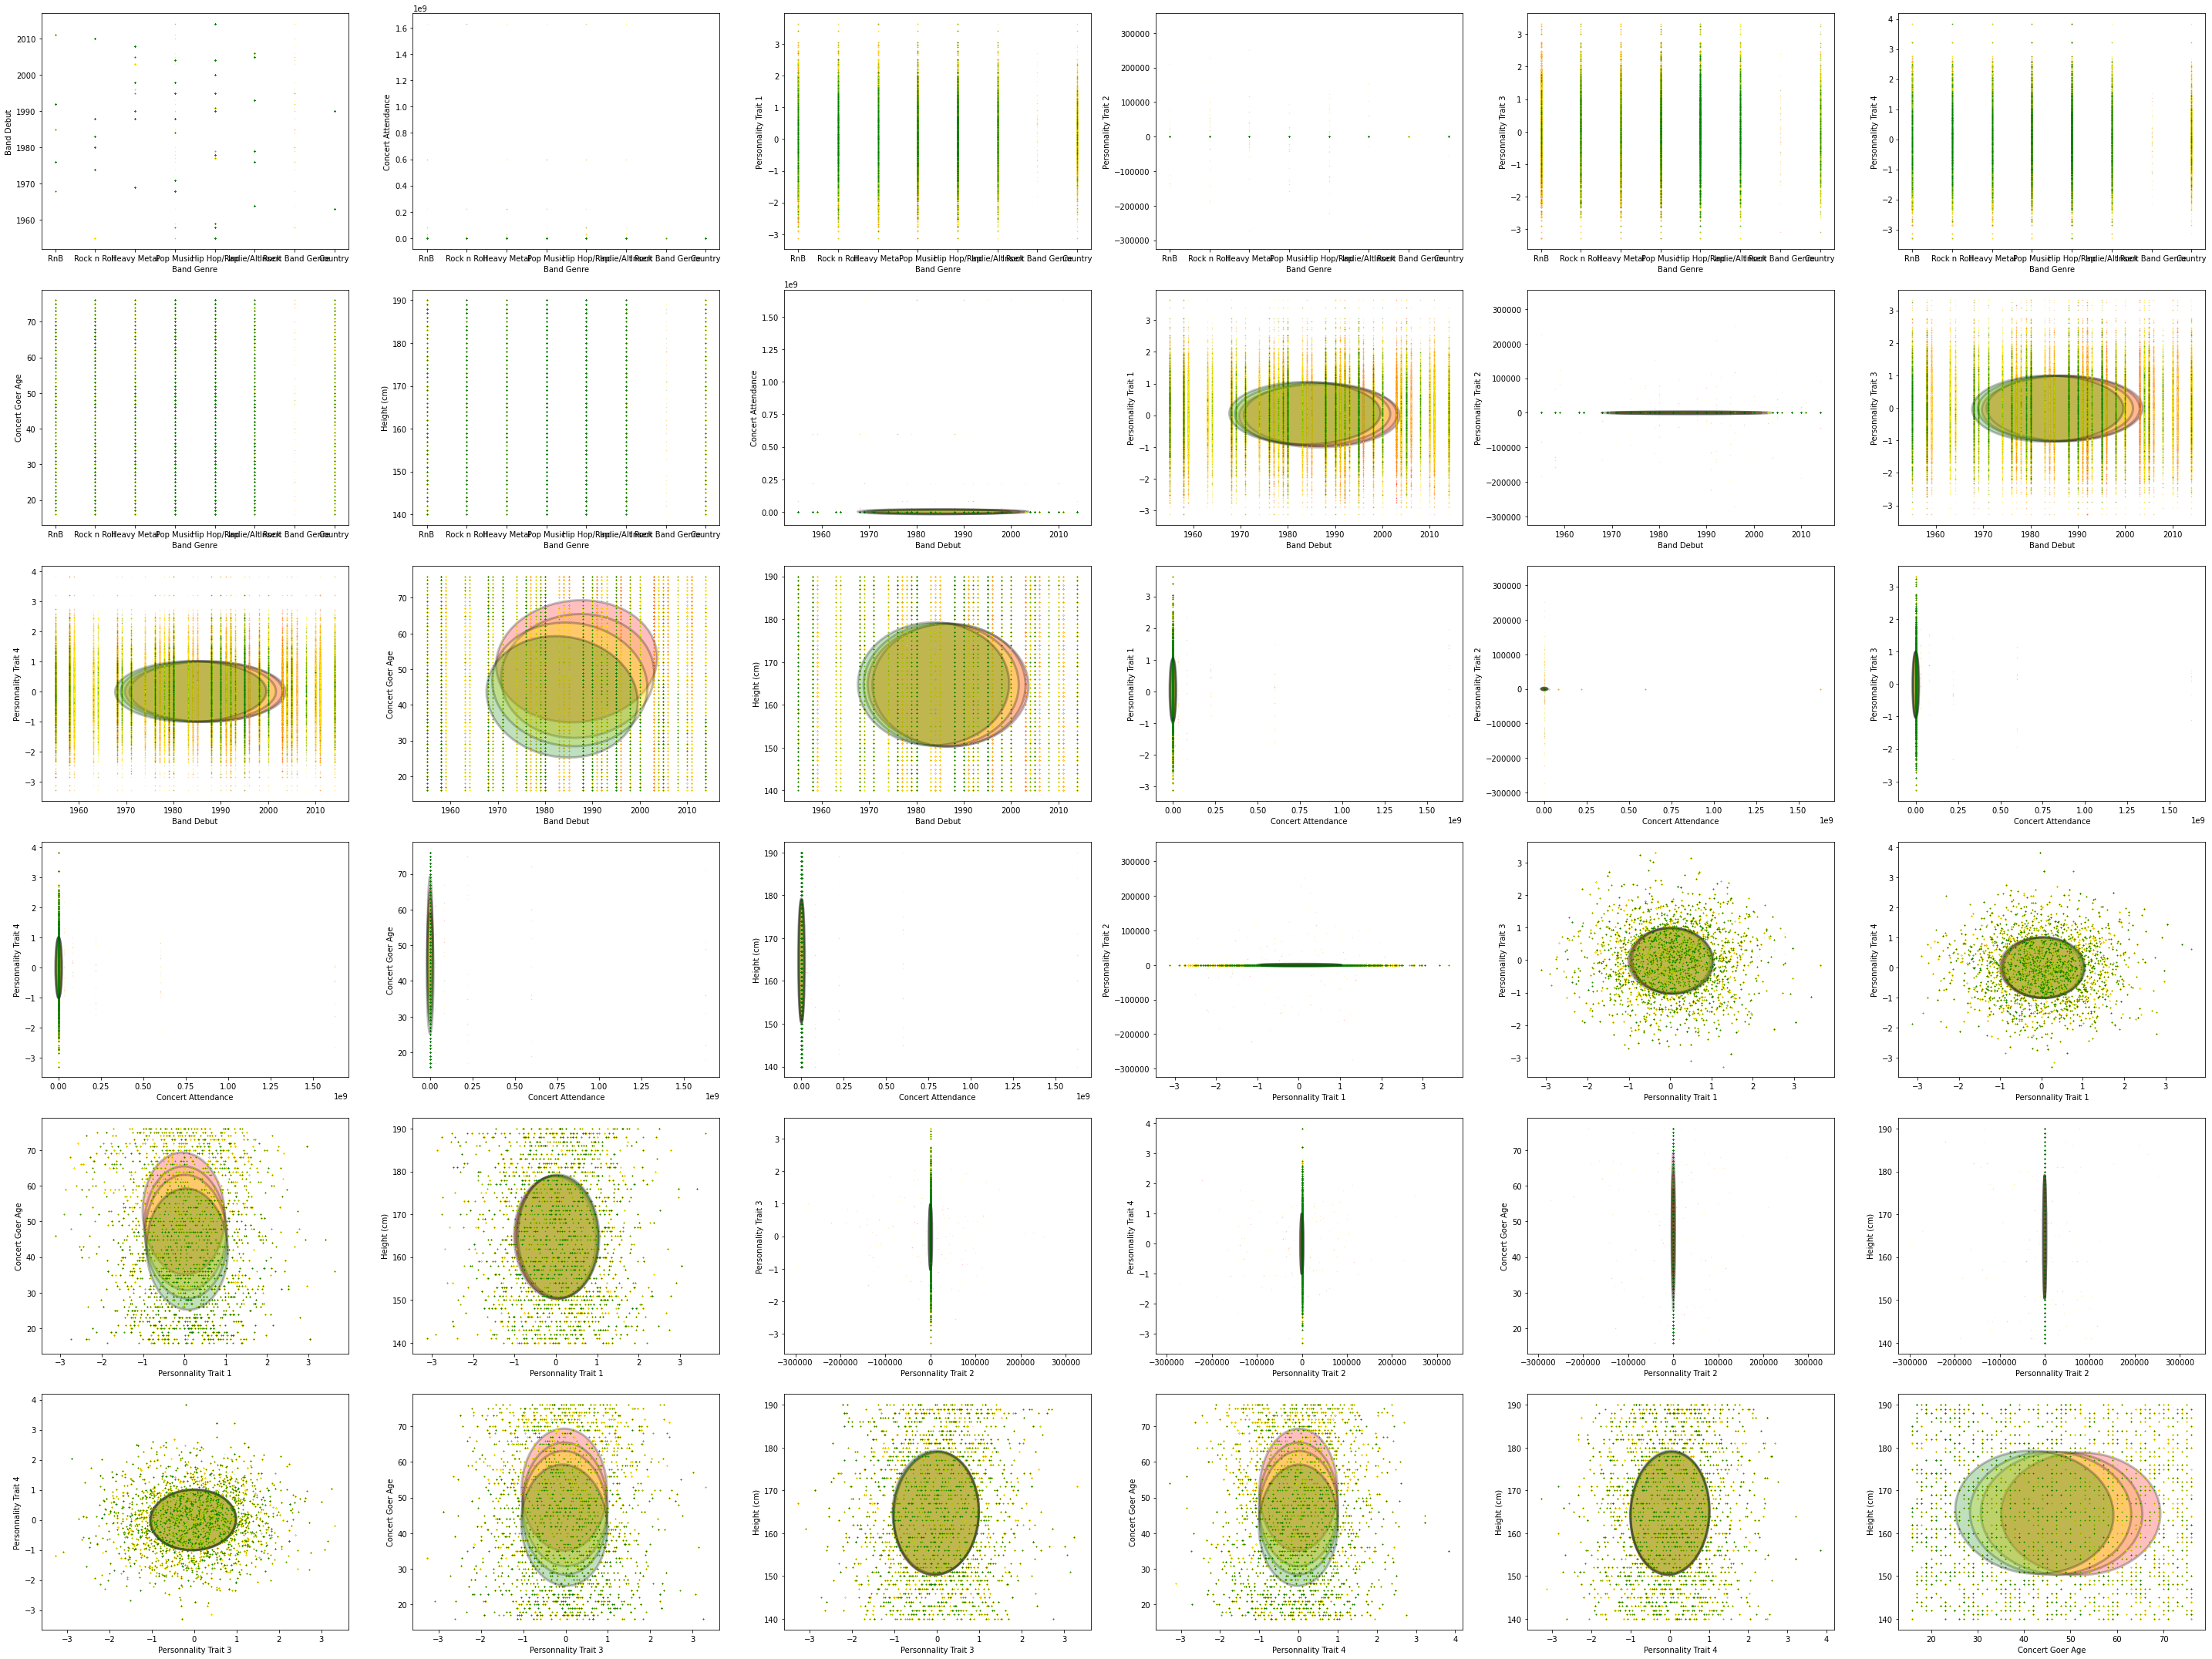

In [6]:
import itertools
from helper_func import viewEllipse

labels=train_data.copy()
labels.drop(['Id','Concert Enjoyment','Band Name','Concert ID','Seated','Rain','Inside Venue','Concert Goer ID','Band Country of Origin',"Concert Goer Country of Origin"], axis=1, inplace=True)
labels=labels.columns.tolist()


comb=list(itertools.combinations(labels,2))
length_plot=int(np.ceil(np.sqrt(len(comb))))
fig, axs = plt.subplots(length_plot,length_plot,figsize=(40,30))


colors = ['red', 'orange', 'yellow', 'green']

for j,(x_label,y_label) in enumerate(comb):
    x=train_data[x_label]
    y=train_data[y_label]
    # subplots 4 classes
    current_ax=axs[int(j/length_plot),j%length_plot]
    current_ax.set(xlabel=x_label, ylabel=y_label)
    for i in range(4):
        xx=x.iloc[classes_idexes[i]]
        yy=y.iloc[classes_idexes[i]]
        current_ax.scatter(xx,yy , color=colors[i], label=idx2class[i], alpha=0.2,s=1, marker='.')
        
        if xx.dtype == 'float64' and yy.dtype == 'float64':
            viewEllipse(np.array([xx,yy]).T, current_ax, scale=1, facecolor=colors[i], edgecolor='black', alpha=0.25)
        
        
        
    
plt.subplots_adjust()
fig.tight_layout()
fig.savefig('scatter.pdf')
fig.savefig('allcomb.png',dpi=300)

In [7]:
train_data.columns.tolist()

['Id',
 'Band Name',
 'Band Genre',
 'Band Country of Origin',
 'Band Debut',
 'Concert ID',
 'Concert Attendance',
 'Inside Venue',
 'Rain',
 'Seated',
 'Personnality Trait 1',
 'Personnality Trait 2',
 'Personnality Trait 3',
 'Personnality Trait 4',
 'Concert Goer Age',
 'Concert Goer ID',
 'Height (cm)',
 'Concert Goer Country of Origin',
 'Concert Enjoyment']